## Load all the relevant packages

In [1]:
using IntervalArithmetic

In [2]:
using IntervalRootFinding

In [3]:
using StaticArrays

In [4]:
using DifferentialEquations

In [5]:
Pkg.add("ForwardDifff")
using ForwardDifff

LoadError: [91m[91munknown package ForwardDifff[39m
macro expansion at .\pkg\entry.jl:53 [inlined]
(::Base.Pkg.Entry.##1#3{String,Base.Pkg.Types.VersionSet})() at .\task.jl:335[39m

In [12]:
using Plots

## Define the ODE to be analysed

In [6]:
Angeli2(u, p) = SVector(
    p[1]*(100-u[1])-p[2]*u[1]*(p[3]*u[2])^p[4]/(p[5]+(p[3]*u[2])^p[4]),
    p[6]*(100-u[2])-p[7]*u[2]*u[1]^p[8]/(p[9]+u[1]^p[8])
    )

Angeli2 (generic function with 1 method)

In [7]:
# set the parameters
alpha1=1
alpha2=1
beta1=200
beta2=10
gamma1=4
gamma2=4
K1=30
K2=1
v=1

p=[alpha1, beta1, v, gamma1, K1, alpha2, beta2, gamma2, K2]; 


## For each variable, create a matrix to put all the solutions (preallocate).  Since we don´t know the number of solutions we will get, make the matrix big enough

In [8]:
x1_matrix=NaN*ones(5,2001); #create a matrix to put at most 5 solutions of 
y1_matrix=NaN*ones(5,2001); #create a matrix to put at most 5 solutions of 

5×2001 Array{Float64,2}:
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN

## Let's start!!! 

In [14]:
counter=1; # initialize the counter

for v in 0:0.005:1 #this is our bifurcation parameter. 
  
    p=[alpha1, beta1, v, gamma1, K1, alpha2, beta2, gamma2, K2]; #update parameter vector
    
    X = IntervalBox(0..100, 2) # create the interval box in the phase plane. in this case, it is a 2d box. 
    # should be as big as state space to make sure we are not missing any solutions 
    
    aa=roots(u->Angeli2(u, p), X) #compute all the roots MAGIC! 
    #output of this fantastic code are small boxes (intervals) with contain the solutions. 
    
    #Since we want to get not an interval, but a real number, we need to take the middle value:
    
    mids = mid.([rt.interval for rt in aa]) #take the middle value for the roots in the boxes
    
    count_dif_sols=1
    # now, it is possible that we get several boxes. this can be because (1) we have several solutions (which we expect, 
    # at least for some parameter values), or because the boxes spit out by the roots function are too small, i.e. thery are finding
    # effectively the same root just with differnt "names" so to say. we shall filter out this second option in the following:
    #and fill our matrices  
    for sol in 1:length(mids)
        
        if (sol==1)
        x1_matrix[count_dif_sols,counter]= mids[sol][1]
        y1_matrix[count_dif_sols,counter]= mids[sol][2]
         count_dif_sols=count_dif_sols+1   
        else
            if (abs(mids[sol][1]-mids[sol-1][1])>0.001)
        x1_matrix[count_dif_sols,counter]= mids[sol][1]
        y1_matrix[count_dif_sols,counter]= mids[sol][2]
         count_dif_sols=count_dif_sols+1  
            end
        end
    end
    counter=counter+1  
end
    


## yeii! we are ready. let's plot our results.

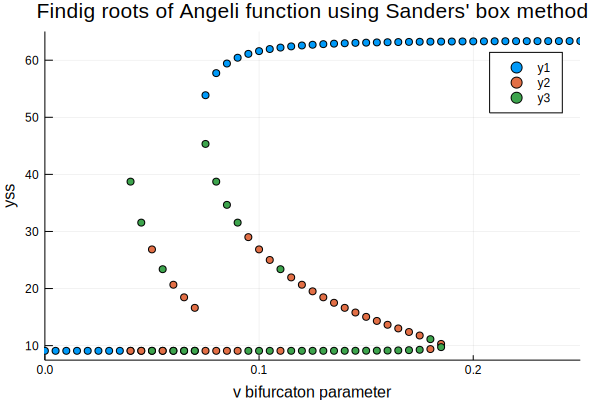

In [15]:
# first, create a vector with the bifurcation parameter values tested in the previous step
vvect=collect(0:0.005:1);

# we are ready to plot now:
scatter(vvect, y1_matrix[1,:])
scatter!(vvect, y1_matrix[2,:])
scatter!(vvect, y1_matrix[3,:])

#just fixing the labels and stuff
plot!(xlabel="v bifurcaton parameter")
plot!(ylabel="yss")
plot!(title="Findig roots of Angeli function using Sanders' box method")
plot!(xlims=(0,.25),xticks=0:.1:.25)